In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Function to apply Prewitt filter and visualize
def apply_prewitt(image_path, title_prefix):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float32) / 255  # Normalize to 0-1 range

    # Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Apply Prewitt filters
    filtered_img_x = cv2.filter2D(img, -1, kernel_x)
    filtered_img_y = cv2.filter2D(img, -1, kernel_y)

    # Logarithmic scaling for better visualization
    filtered_img_x = np.log(np.abs(filtered_img_x) + 1)
    filtered_img_y = np.log(np.abs(filtered_img_y) + 1)

    # Normalize to 0-1 range
    filtered_img_x = filtered_img_x / np.max(filtered_img_x)
    filtered_img_y = filtered_img_y / np.max(filtered_img_y)

    # Display images using Matplotlib
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')

    plt.subplot(1, 3, 2)
    plt.imshow(filtered_img_x, cmap='gray')
    plt.title(f'{title_prefix} Horizontal')

    plt.subplot(1, 3, 3)
    plt.imshow(filtered_img_y, cmap='gray')
    plt.title(f'{title_prefix} Vertical')

    plt.tight_layout()
    plt.show()

    # Save images
    # cv2.imwrite(f'{title_prefix}_horizontal.png', (filtered_img_x * 255).astype(np.uint8))
    # cv2.imwrite(f'{title_prefix}_vertical.png', (filtered_img_y * 255).astype(np.uint8))

In [9]:
# Function to apply edge magnitude calculation and visualization
def apply_edge_magnitude(image_path, title_prefix, thresholds):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float32) / 255  # Normalize to 0-1 range

    # Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Apply Prewitt filters
    filtered_img_x = cv2.filter2D(img, -1, kernel_x)
    filtered_img_y = cv2.filter2D(img, -1, kernel_y)

    # Calculate edge magnitude
    edge_magnitude = np.sqrt(filtered_img_x**2 + filtered_img_y**2)
    log_edge_magnitude = np.log(edge_magnitude + 1)
    log_edge_magnitude = log_edge_magnitude / np.max(log_edge_magnitude)

    # Create binary masks based on thresholds
    bw_edges = []
    for threshold in thresholds:
        bw_edge = edge_magnitude > threshold
        bw_edges.append(bw_edge)

    # Display images using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(log_edge_magnitude, cmap='gray')
    plt.title('Edge Magnitude')

    for i, threshold in enumerate(thresholds):
        plt.subplot(2, 2, i + 2)
        plt.imshow(bw_edges[i], cmap='gray')
        plt.title(f'Magnitude > {threshold}')

    plt.tight_layout()
    plt.show()

    # Save images
    # cv2.imwrite(f'{title_prefix}_logEdgeSum.png', (log_edge_magnitude * 255).astype(np.uint8))
    # for i, threshold in enumerate(thresholds):
        # cv2.imwrite(f'{title_prefix}_bwEdge{i+1}.png', (bw_edges[i] * 255).astype(np.uint8))

In [10]:
# Function to apply Sobel filter and visualize
def apply_sobel(image_path, title_prefix, thresholds):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float32) / 255  # Normalize to 0-1 range

    # Sobel kernels
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Apply Sobel filters
    filtered_img_x = cv2.filter2D(img, -1, kernel_x)
    filtered_img_y = cv2.filter2D(img, -1, kernel_y)

    # Calculate edge magnitude
    edge_magnitude = np.sqrt(filtered_img_x**2 + filtered_img_y**2)
    log_edge_magnitude = np.log(edge_magnitude + 1)
    log_edge_magnitude = log_edge_magnitude / np.max(log_edge_magnitude)

    # Create binary masks based on thresholds
    bw_edges = []
    for threshold in thresholds:
        bw_edge = edge_magnitude > threshold
        bw_edges.append(bw_edge)

    # Display images using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(log_edge_magnitude, cmap='gray')
    plt.title('Edge Magnitude')

    for i, threshold in enumerate(thresholds):
        plt.subplot(2, 2, i + 2)
        plt.imshow(bw_edges[i], cmap='gray')
        plt.title(f'Magnitude > {threshold}')

    plt.tight_layout()
    plt.show()

    # Save images
    # cv2.imwrite(f'{title_prefix}_logEdgeSum.png', (log_edge_magnitude * 255).astype(np.uint8))
    # for i, threshold in enumerate(thresholds):
        # cv2.imwrite(f'{title_prefix}_bwEdge{i+1}.png', (bw_edges[i] * 255).astype(np.uint8))

In [11]:
# Function to apply Roberts filter and visualize
def apply_roberts(image_path, title_prefix, thresholds):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = img.astype(np.float32) / 255  # Normalize to 0-1 range

    # Roberts kernels
    kernel_1 = np.array([[1, 0], [0, -1]])
    kernel_2 = np.array([[0, 1], [-1, 0]])

    # Apply Roberts filters
    filtered_img_1 = cv2.filter2D(img, -1, kernel_1)
    filtered_img_2 = cv2.filter2D(img, -1, kernel_2)

    # Calculate edge magnitude
    edge_magnitude = np.sqrt(filtered_img_1**2 + filtered_img_2**2)
    log_edge_magnitude = np.log(edge_magnitude + 1)
    log_edge_magnitude = log_edge_magnitude / np.max(log_edge_magnitude)

    # Create binary masks based on thresholds
    bw_edges = []
    for threshold in thresholds:
        bw_edge = edge_magnitude > threshold
        bw_edges.append(bw_edge)

    # Display images using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(log_edge_magnitude, cmap='gray')
    plt.title('Edge Magnitude')

    for i, threshold in enumerate(thresholds):
        plt.subplot(2, 2, i + 2)
        plt.imshow(bw_edges[i], cmap='gray')
        plt.title(f'Magnitude > {threshold}')

    plt.tight_layout()
    plt.show()

    # Save images
    # cv2.imwrite(f'{title_prefix}_logEdgeSum.png', (log_edge_magnitude * 255).astype(np.uint8))
    # for i, threshold in enumerate(thresholds):
        # cv2.imwrite(f'{title_prefix}_bwEdge{i+1}.png', (bw_edges[i] * 255).astype(np.uint8))

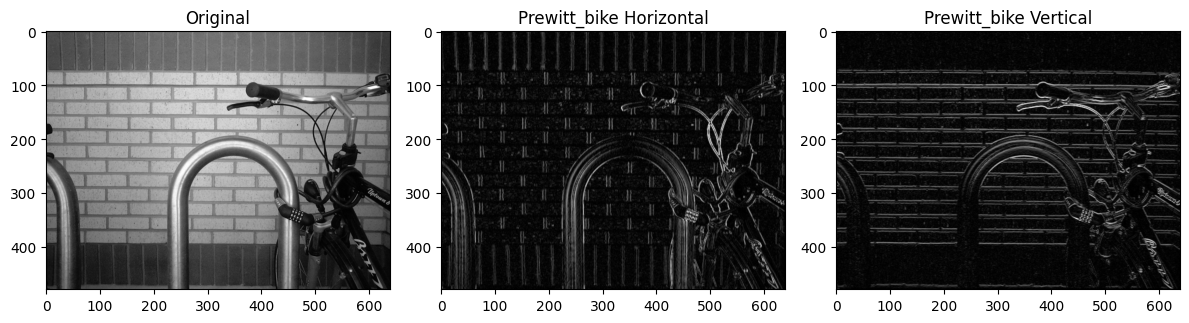

In [24]:
# Call functions with appropriate image paths and titles
apply_prewitt('E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Edge Detection/bike.png', 'Prewitt_bike')

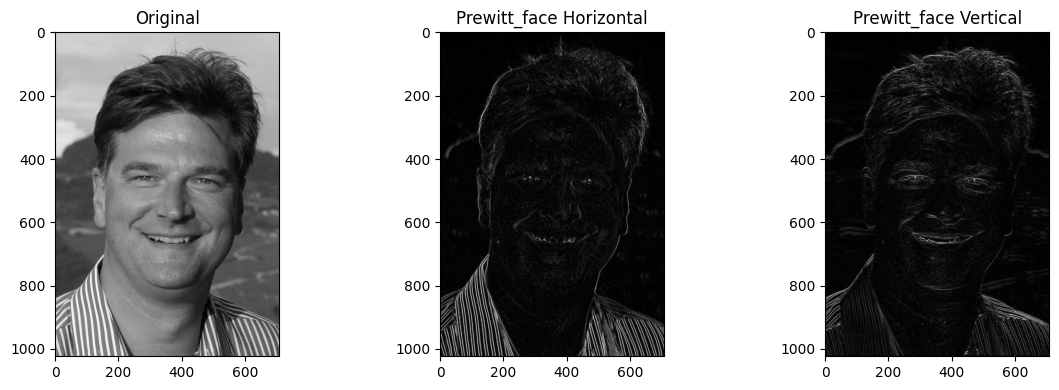

In [25]:
apply_prewitt('E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Edge Detection/berndsface.png', 'Prewitt_face')

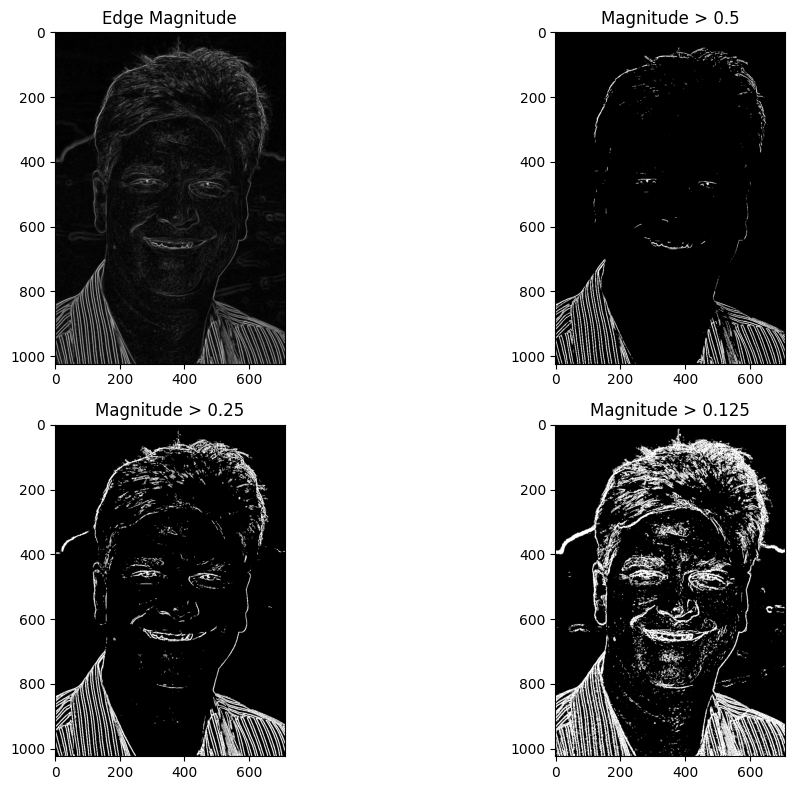

In [23]:

apply_edge_magnitude('E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Edge Detection/berndsface.png', 'Prewitt_face', [0.5, 0.25, 0.125])

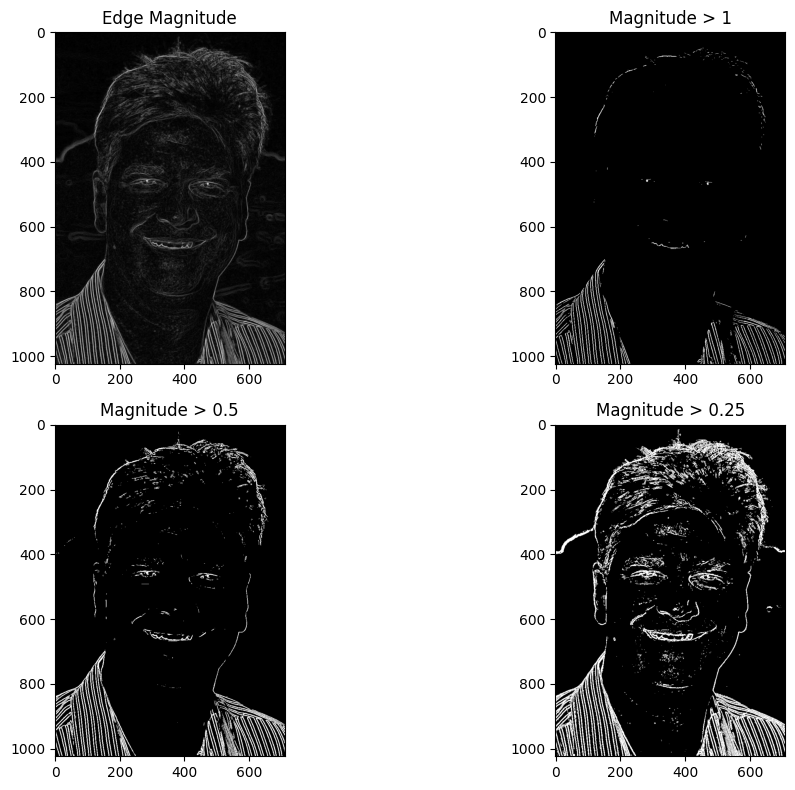

In [21]:

apply_sobel('E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Edge Detection/berndsface.png', 'Sobel_face', [1,0.5,0.25])

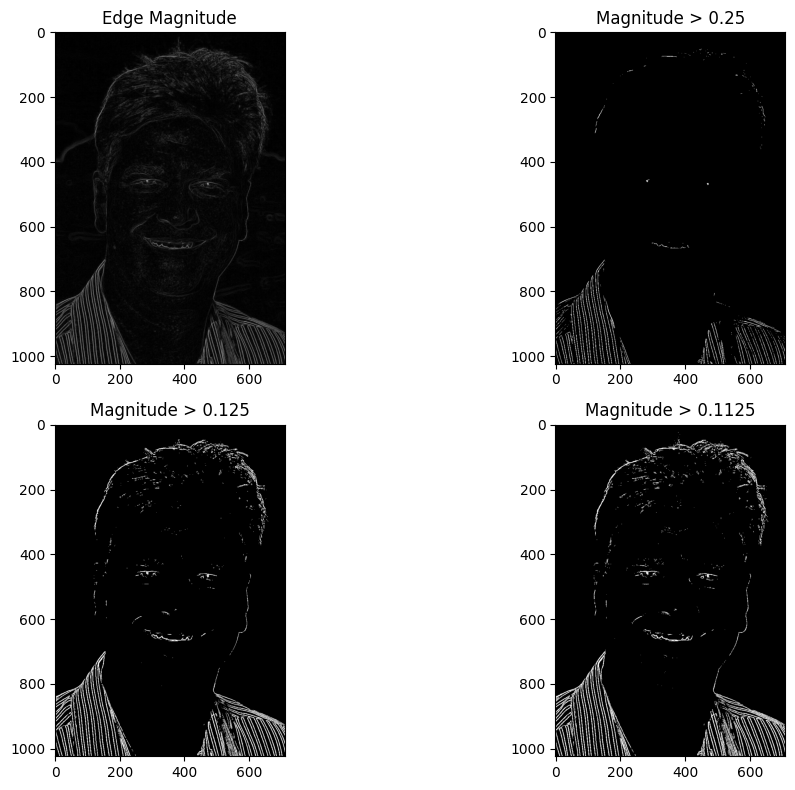

In [27]:

apply_roberts('E:/CodeBase/GitHub/Image_Processing_and_Computer_Vision/1. Basic Image Processing/Edge Detection/berndsface.png', 'Roberts_face', [0.25, 0.125, 0.1125])